In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("data/glass.csv")
df.shape

(214, 10)

In [4]:
# Detect observations with more than one outlier
from collections import Counter
def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

In [5]:
features = df.columns[:-1].tolist()
print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[features]))))

The dataset contains 14 observations with more than 2 outliers


In [6]:
outlier_indices = outlier_hunt(df[features])
df = df.drop(outlier_indices).reset_index(drop=True)
print(df.shape)

(200, 10)


In [8]:
X = df.drop("Type", axis = 1)
y = df["Type"]

In [9]:
X.shape

(214, 9)

In [10]:
y.shape

(214,)

In [11]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


____

## XGBoost - StandardScaler

In [11]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [12]:
X_sc

array([[ 1.21769482,  0.32505721,  1.23450049, ..., -0.14550936,
        -0.34158999, -0.59385208],
       [-0.24185619,  0.68743982,  0.58366648, ..., -1.03588923,
        -0.34158999, -0.59385208],
       [-0.85572617,  0.16560886,  0.54710277, ..., -1.08427944,
        -0.34158999, -0.59385208],
       ...,
       [ 1.06315412,  1.36871914, -2.04892053, ..., -0.44552867,
         4.18900112, -0.59385208],
       [-0.71406386,  1.39770975, -2.04892053, ..., -0.4068165 ,
         3.99562223, -0.59385208],
       [-0.45649604,  1.18028018, -2.04892053, ..., -0.27132391,
         4.27187779, -0.59385208]])

In [13]:
X_sc_train, X_sc_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.25, random_state=42)
X_sc_train.shape, y_train.shape, X_sc_test.shape, y_test.shape

((150, 9), (150,), (50, 9), (50,))

In [14]:
model= xgb.XGBClassifier()
model.fit(X_sc_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [16]:
y_pred = model.predict(X_sc_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[12  6  0  0  0  0]
 [ 2 14  0  2  0  0]
 [ 1  1  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  5]]
0.72


C:\Users\sarak\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


___
## XGBoost Classifier

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160, 9), (160,), (54, 9), (54,))

In [13]:
model= xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [14]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[14  0  0  0  0  0]
 [ 3 15  0  1  1  1]
 [ 3  0  1  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]
0.7962962962962963


C:\Users\sarak\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [15]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          1       0.70      1.00      0.82        14
          2       0.88      0.71      0.79        21
          3       1.00      0.25      0.40         4
          5       0.67      0.50      0.57         4
          6       0.75      1.00      0.86         3
          7       0.89      1.00      0.94         8

avg / total       0.82      0.80      0.78        54



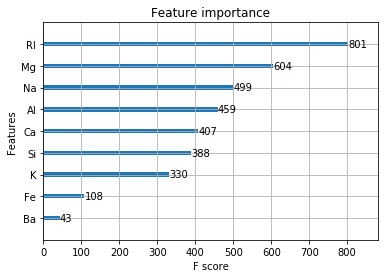

In [26]:
model_importances = XGBClassifier(n_estimators=200)
model_importances.fit(X_train, y_train)
plot_importance(model_importances)
plt.show()

In [28]:
print('The accuracy of the xgb classifier is {:.4f} on training data'.format(model.score(X_train, y_train)))
print('The accuracy of the xgb classifier is {:.4f} on test data'.format(model.score(X_test, y_test)))

The accuracy of the xgb classifier is 1.0000 on training data
The accuracy of the xgb classifier is 0.7963 on test data


C:\Users\sarak\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\sarak\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
